In [1]:
'''
Routine takes all the pictures in a directory and calculates & plots:

The average picture
The histogram of the picture averages
The picture of the standard deviation
The histogram of the standard deviation of each pixel across pixels.

'''
import matplotlib.pyplot as plt
import numpy as np
import array
import bz2
import glob
width=640 # picture dimensions
height=480
size = width * height
header=0

In [2]:
directory = 'Teledyne_Camera_Testing/20220824_data/' #directory of the pictures
file_dict = {"cam1":{}, "cam2":{}} # the dict
file_dict["cam1"]["files"] = {k:{} for k in glob.glob(directory+'cam1_*.raw.bz2')} # add the files to the dict
file_dict["cam2"]["files"] = {k:{} for k in glob.glob(directory+'cam2_*.raw.bz2')}

In [3]:
#plt.ion()
for camera in list(file_dict.keys()):
    '''
    Get the images
    '''
    for file in list(file_dict[camera]["files"].keys()):
        b = array.array("H")
        with bz2.open(file, 'rb') as f:
            b.fromfile(f,size)
        i=np.array(b,dtype = np.double)
        file_dict[camera]['files'][file]['image'] = i
    '''
    Find the average of each picture and add it to dict
    '''
    average = []
    for file in list(file_dict[camera]["files"].keys()):
        average.append(np.average(file_dict[camera]['files'][file]['image']))
    file_dict[camera]['average'] = average
    '''
    Find the pictures average and standard deviation across the set of pictures
    '''
    npop = 0
    picsum = np.zeros(size, dtype = np.double)
    picsumsq = np.zeros(size, dtype = np.double)
    n = 0
    for file in list(file_dict[camera]["files"].keys()):
        i = file_dict[camera]['files'][file]['image']
        file_dict[camera]['files'][file]['average'] = np.average(i)
        picsum += i
        picsumsq += i**2
        n += 1
    print("for camera "+camera+" started with ",n," files")
    ave = picsum / n
    file_dict[camera]['average1'] = ave
    sigma = np.sqrt(picsumsq/n - ave**2)
    file_dict[camera]['sigma1'] = sigma
    '''
    Discard pictures with an average value more than 5 x the standard deviation
    '''
    for file in list(file_dict[camera]['files'].keys()):
        dev = (ave - file_dict[camera]['files'][file]['image'])**2/sigma**2
        if(dev.sum()/size) > 5.:
            npop+= 1
            file_dict[camera]['files'].pop(file)
    '''
    Find the pictures average and standard deviation again after nixing some pictures.
    '''
    picsum = np.zeros(size, dtype = np.double)
    picsumsq = np.zeros(size, dtype = np.double)
    n = 0
    for file in list(file_dict[camera]["files"].keys()):
        i = file_dict[camera]['files'][file]['image']
        picsum += i
        picsumsq += i**2
        n += 1
    print("for camera "+camera+" second round had ",n," files")
    ave = picsum / n
    file_dict[camera]['average2'] = ave
    sigma = np.sqrt(picsumsq/n - ave**2)
    file_dict[camera]['sigma2'] = sigma
    print("For camera "+camera+" dumped ",npop," files")

for camera cam1 started with  33  files
for camera cam1 second round had  31  files
For camera cam1 dumped  2  files
for camera cam2 started with  33  files
for camera cam2 second round had  29  files
For camera cam2 dumped  4  files


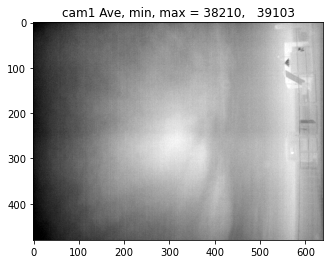

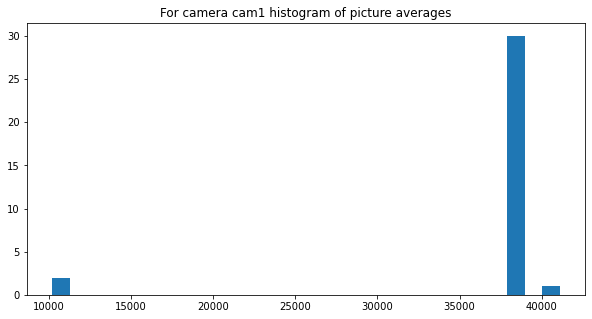

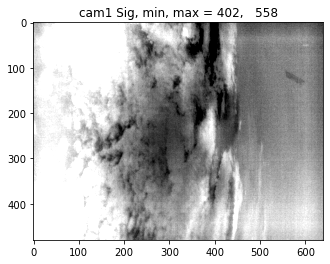

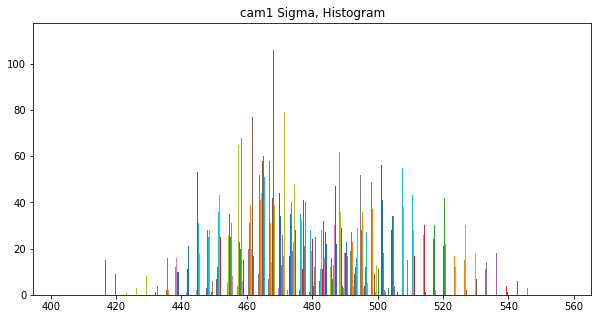

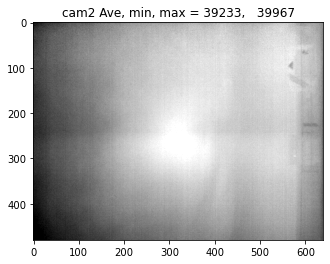

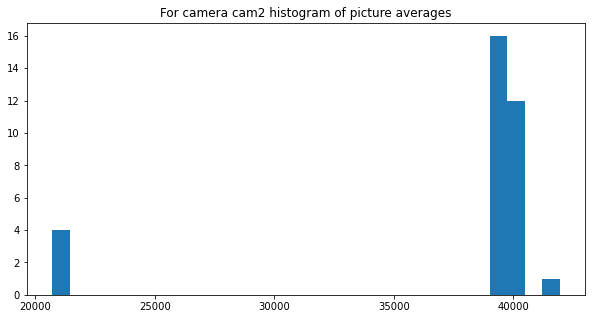

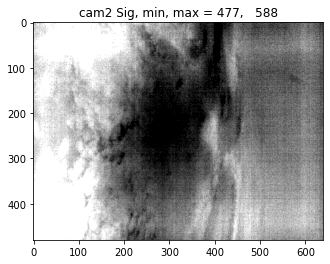

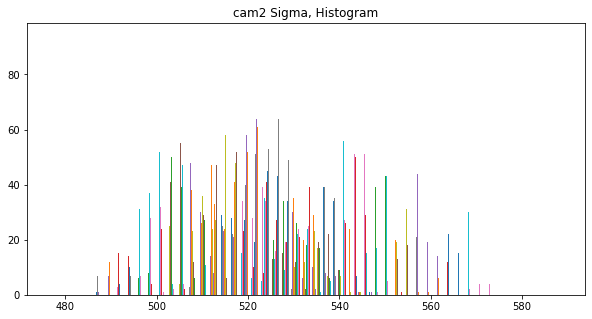

In [4]:
for camera in list(file_dict.keys()):    
    '''
    reshape the pictures and find the range of averages and sigmas for plotting
    '''
    aveimage = file_dict[camera]['average2'].reshape((height,width))
    minaveimage = np.amin(aveimage)
    maxaveimage = np.amax(aveimage)
    sigimage = file_dict[camera]['sigma2'].reshape((height,width))
    minsigimage = np.amin(sigimage)
    maxsigimage = np.amax(sigimage)
    '''
    Plot the average picture
    '''
    plt.subplots()
    delave = maxaveimage - minaveimage
    c = plt.imshow(aveimage,cmap='gray',vmin=minaveimage+0.1*delave,vmax=maxaveimage-0.1*delave)
    plt.title('{:} Ave, min, max = {:.0f},   {:.0f}'.format(camera,minaveimage,maxaveimage))
    plt.show
    '''
    Plot the histogram of picture averages
    '''
    fig1, axis1 = plt.subplots(figsize=(10.,5.))
    maxavepic = max(file_dict[camera]['average'])
    minavepic = min(file_dict[camera]['average'])
    bins = np.linspace(minavepic, maxavepic, 30)
    axis1.hist(file_dict[camera]['average'],bins)
    plt.title('For camera {:} histogram of picture averages'.format(camera))
    plt.show
    '''
    Plot the image of the pixel standard deviation over the pictures taken
    '''
    #figure.canvas.flush_events()
    plt.subplots()
    delsig = maxsigimage - minsigimage
    c = plt.imshow(sigimage,cmap='gray',vmin=minsigimage+0.2*delsig,vmax=maxsigimage-0.38*delsig)
    plt.title('{:} Sig, min, max = {:.0f},   {:.0f}'.format(camera,minsigimage,maxsigimage))
    plt.show
    #figure.canvas.flush_events()
    '''
    Plot the histogram of the standard deviations of all the pixels
    '''
    fig2, axis2 = plt.subplots(figsize=(10.,5.))
    step = (maxsigimage - minsigimage)/50
    bins = np.linspace(minsigimage, maxsigimage, 50)
    axis2.hist(sigimage, bins)
    plt.title('{:} Sigma, Histogram'.format(camera))
    plt.show